## 2020.03.12 DACON 온도 추정 경진대회

### EDA 2 by David Song

기본적인 column 분포도, missing value 등에 대한 EAD 실시 자료

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
print(os.getcwd())

/content


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import pickle

# load the data 
train = pd.read_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/02.dacon_temp/data/train.csv")
test = pd.read_csv("./gdrive/My Drive/Colab Notebooks/2020_1_data/02.dacon_temp/data/test.csv")
total_data = pd.concat([train,test], sort=False)

print(train.info())
print(test.info())
print(total_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4752 entries, 0 to 4751
Data columns (total 60 columns):
id     4752 non-null int64
X00    4752 non-null float64
X01    4752 non-null float64
X02    4752 non-null float64
X03    4752 non-null float64
X04    4752 non-null float64
X05    4752 non-null float64
X06    4752 non-null float64
X07    4752 non-null float64
X08    4752 non-null float64
X09    4752 non-null float64
X10    4752 non-null float64
X11    4752 non-null float64
X12    4752 non-null float64
X13    4752 non-null float64
X14    4752 non-null float64
X15    4752 non-null float64
X16    4752 non-null float64
X17    4752 non-null float64
X18    4752 non-null float64
X19    4752 non-null float64
X20    4752 non-null float64
X21    4752 non-null float64
X22    4752 non-null float64
X23    4752 non-null float64
X24    4752 non-null float64
X25    4752 non-null float64
X26    4752 non-null float64
X27    4752 non-null float64
X28    4752 non-null float64
X29    4752 non-null floa

### Check Shape

In [0]:
print(train.shape)
print(test.shape)
print(total_data.shape)

(4752, 60)
(11520, 41)
(16272, 60)


## Missing Values

In [0]:
print('Y18 total : {}'.format(len(train)))
print('Y18 count: {}'.format(train['Y18'].count()))
print('Y18 null count: {} '.format(len(train) - train['Y18'].count()))


Y18 total : 4752
Y18 count: 432
Y18 null count: 4320 


In [0]:
total = train.isnull().sum()
percent = (total / train.isnull().count()*100)

pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).sort_values(by='Percent', ascending=False)

,Total,Percent
Y18,4320,90.909091
Y09,432,9.090909
Y00,432,9.090909
Y01,432,9.090909
Y02,432,9.090909
Y03,432,9.090909
Y05,432,9.090909
Y06,432,9.090909
Y07,432,9.090909
Y08,432,9.090909


### X00 ~ X39: null 값이 없다.
### Y00 ~ Y17: 432 rows null 값
### Y18: 4,320 rows null 값

In [0]:
'''
  @brief  show plots of each column values
  @param  column name or column group
  @pre    data
  @post   show the distribution of data
'''

def show_plot(col_name):
  plt.plot(train[col_name])
  plt.title('Train.csv')
  plt.show()
  plt.plot(test[col_name])
  plt.title('Test.csv')
  plt.show()
  sns.boxplot(x= 'variable', y = 'value', data=pd.melt(total_data[col_name]))
  plt.show()

In [0]:
def kde_plot(col_name):
  for col in col_name:
    sns.kdeplot(total_data[col], kernel='epa')
  plt.show()

## 1. 기온

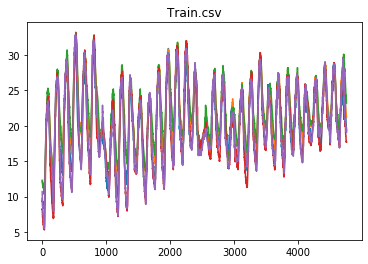

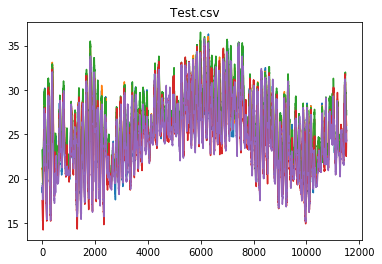

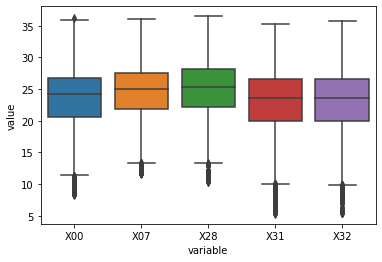

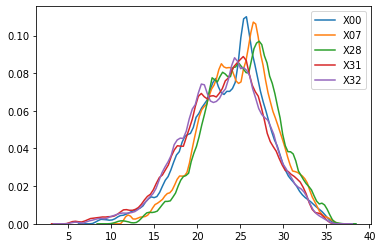

In [0]:
temp = ['X00', 'X07', 'X28', 'X31', 'X32']
show_plot(temp)
kde_plot(temp)

- 5개의 data 모두가 유사한 분포를 보인다고 생각된다. <br>
- 특히 X00, X07이 유사한 분포 <br>
- X31, X32이 유사한 분포를 보인다.

## 2. 현지기압

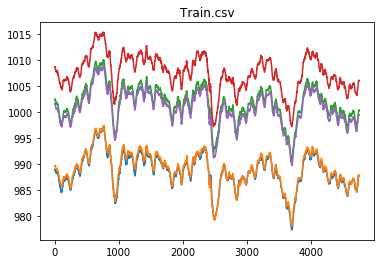

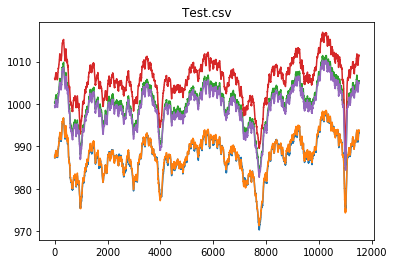

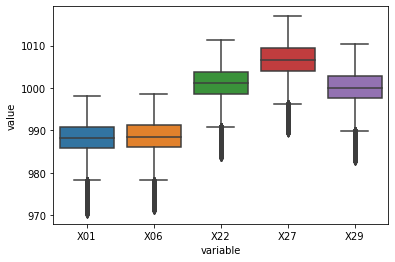

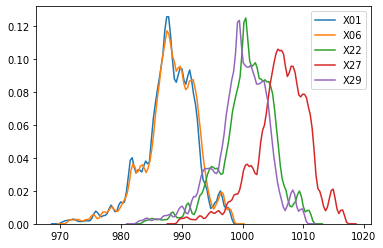

In [0]:
pressure=['X01', 'X06', 'X22', 'X27', 'X29']
show_plot(pressure)
kde_plot(pressure)

- X01, X06: 유사한 분포 <br>
- X22, X29: 유사한 분포 <br>
- X27: 독자적인 분포

## 3. 풍속

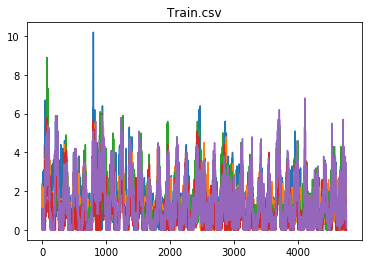

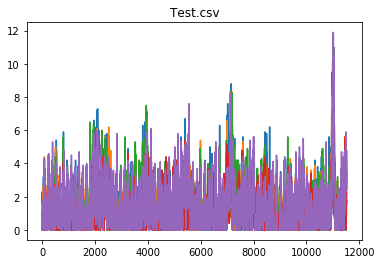

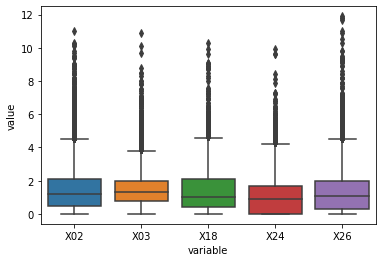

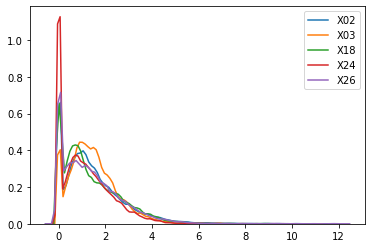

In [0]:
wind_speed=['X02', 'X03', 'X18', 'X24', 'X26']
show_plot(wind_speed)
kde_plot(wind_speed)

- X24를 제외하고 모두 비슷한 분포를 보인다. <br>
- X24: 독자적인 분포

## 4. 일일 누적강수량

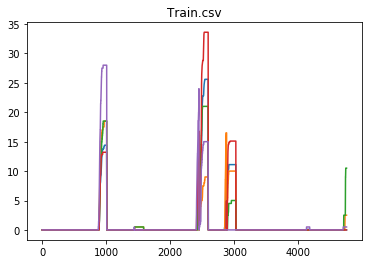

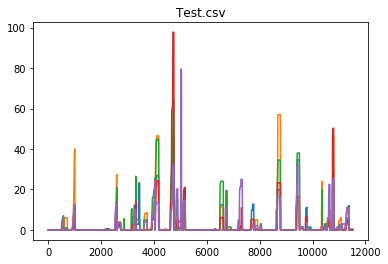

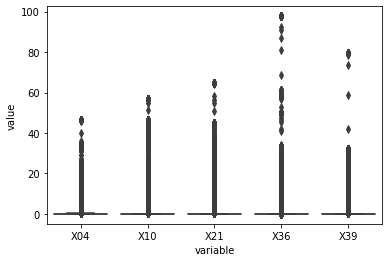

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:353: RuntimeWarning: divide by zero encountered in true_divide
  k = (X.T - grid[:, None])/bw  # uses broadcasting to make a gridsize x nobs
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:353: RuntimeWarning: invalid value encountered in true_divide
  k = (X.T - grid[:, None])/bw  # uses broadcasting to make a gridsize x nobs
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:361: RuntimeWarning: invalid value encountered in less
  domain_mask = (k < z_lo) | (k > z_high)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:361: RuntimeWarning: invalid value encountered in greater
  domain_mask = (k < z_lo) | (k > z_high)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:367: RuntimeWarning: invalid value encountered in less
  k[k < 0] = 0 # get rid of any negative values, do we need this?
/usr/local/lib/python3.6/dist-packages/st

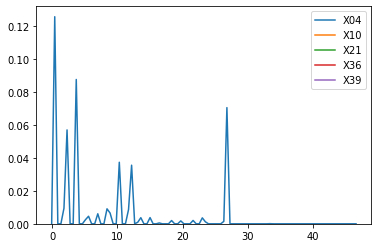

In [0]:
rain=['X04', 'X10', 'X21', 'X36', 'X39']
show_plot(rain)
kde_plot(rain)

- 모두 불규칙한 분포를 보인다.

## 5. 해면기압

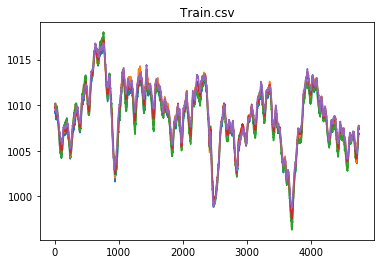

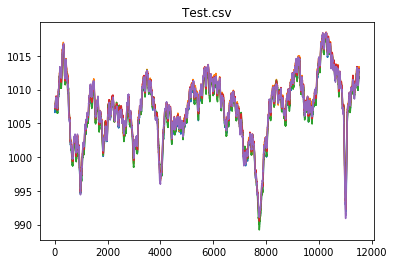

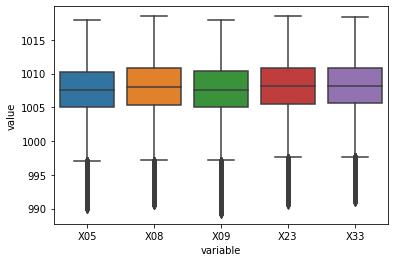

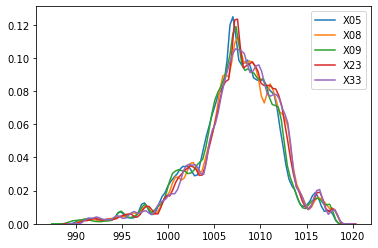

In [0]:
sea_press=['X05', 'X08', 'X09', 'X23', 'X33']
show_plot(sea_press)
kde_plot(sea_press)

- 5가지 data 모두 일정 분포를 보인다.

## 6. 일일 누적일사량

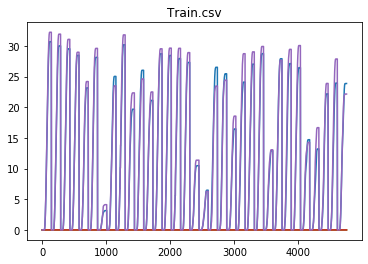

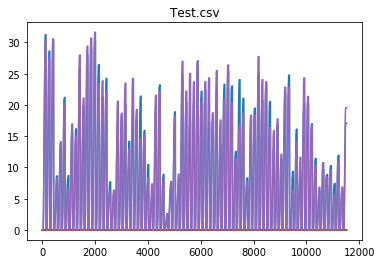

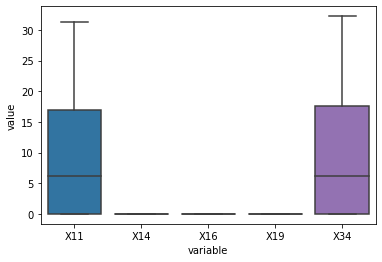

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


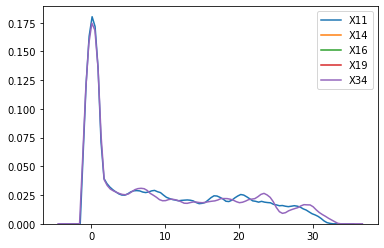

In [0]:
insolation = ['X11', 'X14', 'X16', 'X19', 'X34']
show_plot(insolation)
kde_plot(insolation)

- X14, X16, X19: 0값이 대부분 <br>
- X11, X34: 유의미한 값

## 7.습도


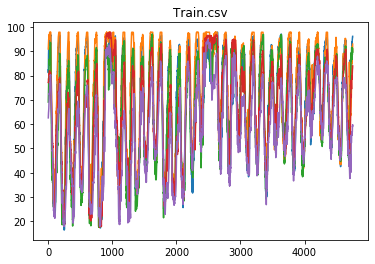

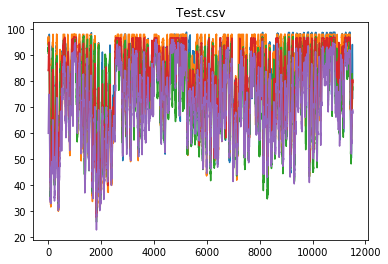

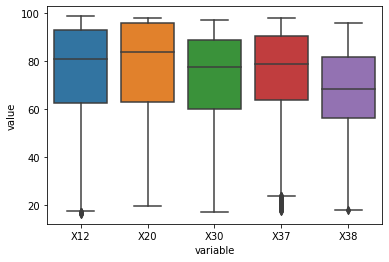

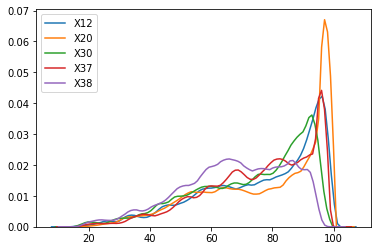

In [0]:
humidity = ['X12', 'X20', 'X30', 'X37', 'X38']
show_plot(humidity)
kde_plot(humidity)

- X12, X37: 비슷한 분포를 보인다. <br>
- 나머지: 독자적인 분포를 보인다.

## 8. 풍향

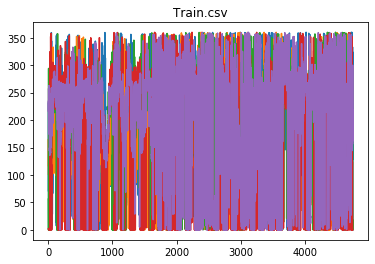

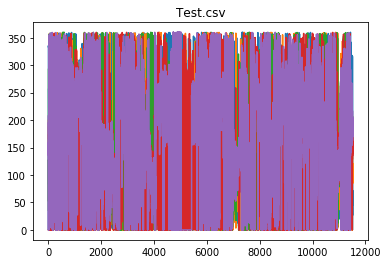

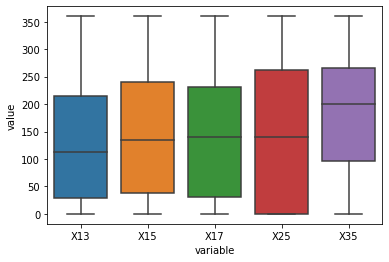

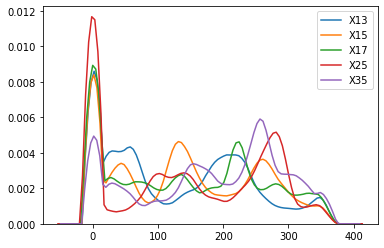

In [0]:
wind_dir = ['X13', 'X15', 'X17', 'X25', 'X35']
show_plot(wind_dir)
kde_plot(wind_dir)

- 값이 '0' 위주일 때 가장 많은 값을 가짐.<br>
- 분포는 각기 상이하다.

## 9. Y00 ~ Y17 plot

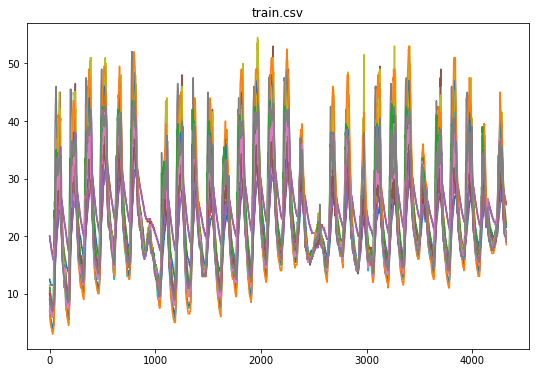

In [6]:
y17 = []
# [Y00, Y01, Y02, .... , Y17]
for i in range(18):
  y17.append('Y{:02d}'.format(i))

plt.figure(figsize=(9,6))
plt.plot(train[y17])
plt.title('train.csv')
plt.show()


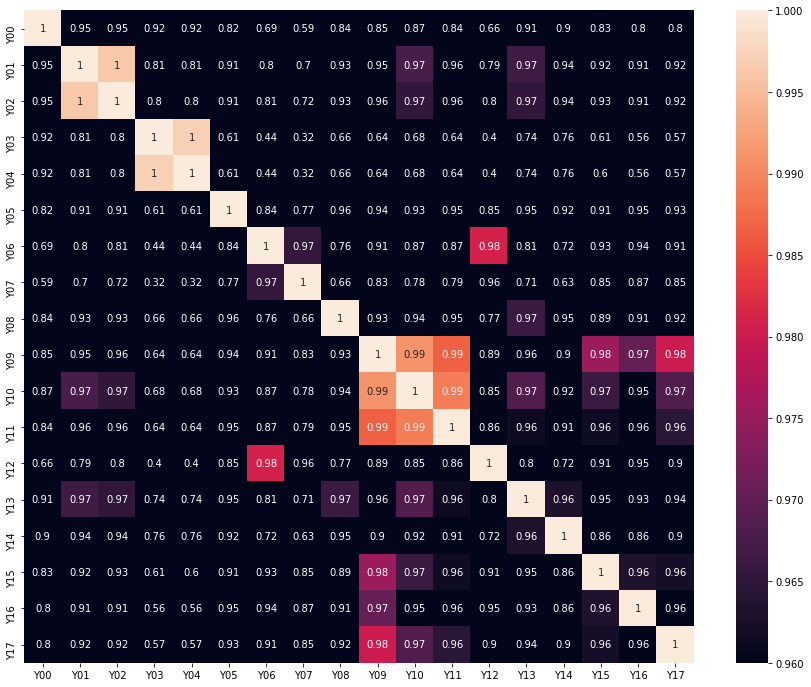

In [8]:
plt.figure(figsize=(15,12))
#sns.heatmap(total_data[y17].corr(), vmin=0, vmax=1, annot=True)
sns.heatmap(total_data[y17].corr(), vmin=0.96, vmax=1, annot=True)

### 0.95이상의 상관관계
- Y03, Y04: 강한 상관관계(1) <br>
- Y01, Y02: 강한 상관관계(1) <br>
- Y09, Y10, Y11: 강한 상관관계(0.99) <br>
- Y06, Y12: 강한 상관관계(0.98) <br>
- Y09, Y15: 강한 상관관계(0.98) <br>
- Y09, Y17: 강한 상관관계(0.98) <br>
- Y10, Y01&Y02: 강한 상관관계(0.97) <br>
- Y13, Y01&Y02: 강한 상관관계(0.97) <br>
- Y06, Y07: 강한 상관관계(0.97) <br>
- Y08&Y10, Y13: 강한 상관관계(0.97) <br><br>




### 0.95이상의 상관관계를 갖는 factor들을 그룹화.
- Y01, Y02, Y09, Y10, Y11, Y13
- Y05, Y08, Y11, Y13, Y16
- Y06, Y07, Y12
- Y08, Y11, Y13, Y14
- Y09, Y10, Y11, Y13, Y15, Y16, Y17

### 0.97이상의 상관관계
- Y01, Y02, Y10, Y13
- Y03, Y04
- Y06, Y07, Y12
- Y09, Y10, Y11, Y13, Y15, Y15, Y17
- Y08, Y13


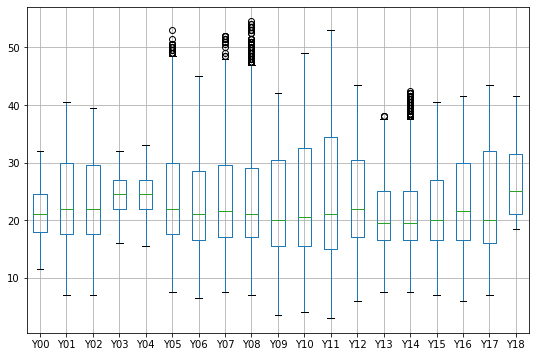

In [23]:
y18 = y17 +['Y18']
plt.figure(figsize=(9,6))
total_data[y18].boxplot()
plt.show()

## 10. Y18(예측값)

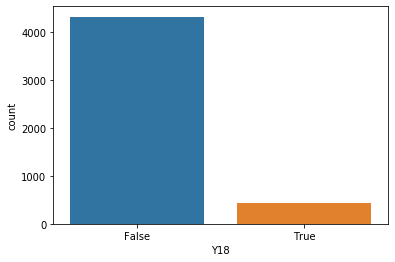

In [25]:
sns.countplot(train['Y18'].notnull())

- 432 rows: null값이 아님. <br>
- 4,320 rows: not null 값. <br>

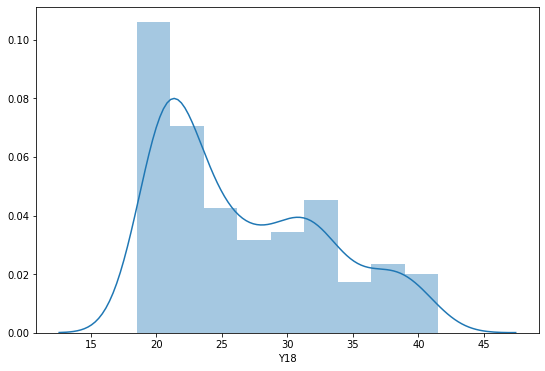

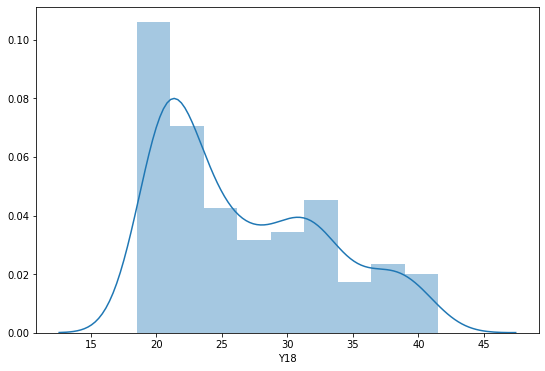

In [29]:
plt.figure(figsize=(9,6))
sns.distplot(train['Y18'])
plt.show()

plt.figure(figsize=(9,6))
sns.distplot(train.loc[train['Y18'].notnull()]['Y18'])
plt.show()

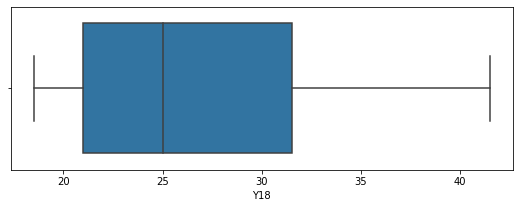

In [28]:
plt.figure(figsize=(9,3))
sns.boxplot(train['Y18'])
plt.show()

- 20 ~ 25 사이가 가장 많은 분포를 보인다. <br>
- 평균값: 25 <br>